This is just a fun little program for taking a style of an image into another image. We'll be using TensorFlow in this project with a pretrained Neural Style Transfer Model. Make sure to have TensorFlow installed before proceeding.

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Download Pretrained Model

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Load Image

In [51]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

load_mage function will load and preprocess our image before passing it through the model

In [52]:
content_image = load_image('cat.jpg')
style_image = load_image('starrynight.jfif')

# Preview Original Images

In [53]:
content_image.shape

TensorShape([1, 1440, 2560, 3])

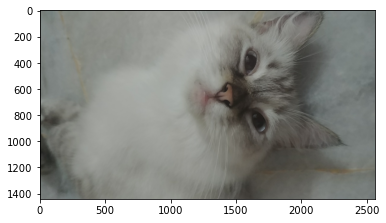

In [54]:
plt.imshow(np.squeeze(content_image))
plt.show()

This is the base picture(my lovely cat) that we want to apply our style effect

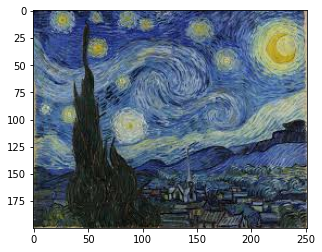

In [55]:
plt.imshow(np.squeeze(style_image))
plt.show()

This is the image style that we will try to apply on our base picture, which in this case we'll use the Starry Night painting by Vincent van Gogh

# Stylize Image

In [56]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

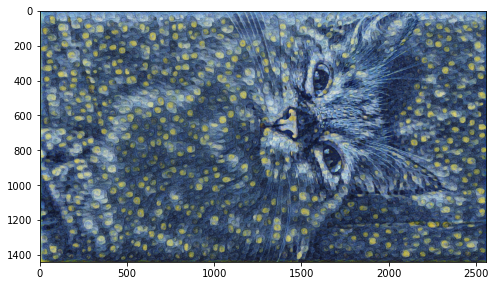

In [60]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(np.squeeze(stylized_image))
plt.show()

Voila! here we can see my cat picture but in the style of Vincent van Gogh's Starry Night. Pretty neat huh?

# Export Image

Let's export this image so you can brag how artsy you are on social media!

In [58]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True